In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_count = pd.read_csv("results/hochuli/mnist_count.csv")
df_count

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,1.331835,0.795228,0.688056,23.679059,940,1486464000
1,1,2,0.680302,0.606176,0.773611,26.557839,391,1486464000
2,1,3,0.568314,0.518438,0.805778,22.981169,405,1486464000
3,1,4,0.503157,0.509535,0.803444,16.296107,351,1486464000
4,1,5,0.460540,0.467982,0.825444,15.049395,9545,1486464000
...,...,...,...,...,...,...,...,...
150,5,27,0.222286,0.284510,0.898889,22.999630,25067,1486464000
151,5,28,0.218549,0.277743,0.902111,23.074772,599,1486464000
152,5,29,0.215185,0.286916,0.897556,18.717154,496,1486464000
153,5,30,0.210016,0.286143,0.900500,22.587636,422,1486464000


In [3]:
df_original = pd.read_csv("results/hochuli/mnist_original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,1.422063,0.798875,0.694611,14.751366,0,0
1,1,2,0.688009,0.625118,0.761611,14.043204,0,0
2,1,3,0.573279,0.537560,0.799111,14.121323,0,0
3,1,4,0.504380,0.479726,0.814333,14.112932,0,0
4,1,5,0.457492,0.468613,0.828500,13.781080,0,0
...,...,...,...,...,...,...,...,...
150,5,27,0.207973,0.272041,0.902944,17.090955,0,0
151,5,28,0.203639,0.292908,0.899056,16.967920,0,0
152,5,29,0.200475,0.266005,0.906389,17.739021,0,0
153,5,30,0.194779,0.276662,0.904056,17.447690,0,0


In [4]:
df_diff = pd.read_csv("results/hochuli/mnist_diff.csv")
df_diff

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.268090,1.435660,0.465667,15.463974,0,0
1,1,2,0.849484,0.699995,0.752111,14.396565,0,0
2,1,3,0.626227,0.549374,0.798556,14.304961,0,0
3,1,4,0.520894,0.474812,0.821833,14.618159,0,0
4,1,5,0.464820,0.455560,0.833389,14.447915,0,0
...,...,...,...,...,...,...,...,...
150,5,27,0.202706,0.265577,0.908611,27.900593,0,0
151,5,28,0.198660,0.277902,0.897944,27.959399,0,0
152,5,29,0.192600,0.289587,0.900000,27.539060,0,0
153,5,30,0.189166,0.275729,0.900389,28.357579,0,0


In [5]:
# splitting training and test
df_count_train = df_count[df_count["epoch"] != -1]
df_count_test = df_count[df_count["epoch"] == -1]
df_original_train = df_original[df_original["epoch"] != -1]
df_original_test = df_original[df_original["epoch"] == -1]
df_diff_train = df_diff[df_diff["epoch"] != -1]
df_diff_test = df_diff[df_diff["epoch"] == -1]

In [6]:
# add relu proportion
df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
df_diff_train["relu_proportion"] = df_diff_train["zero_relu_call"] / df_diff_train["total_relu_call"]

/tmp/ipykernel_12176/561248041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
/tmp/ipykernel_12176/561248041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
/tmp/ipykernel_12176/561248041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

## Frequência da ReLU

In [7]:
temp = df_count_train.groupby("execution").sum()
relu_proportion = temp["zero_relu_call"] / temp["total_relu_call"]
print(f"Proporção Média da ReLU: {relu_proportion.mean()}    1/{round(1/relu_proportion.mean()):_}")

Proporção Média da ReLU: 3.989449682826718e-06    1/250_661


<Axes: xlabel='epoch', ylabel='relu_proportion'>

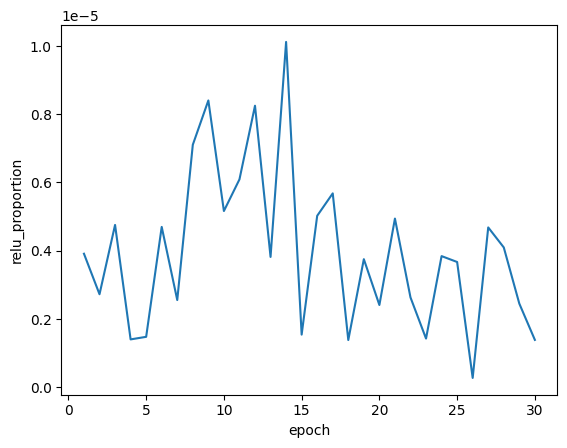

In [8]:
df_train_avg = df_count_train.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")

## Eficiência do Modelo

In [9]:
print(f"Acurácia (teste) média: {round(100*df_count_test['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 89.53%


<Axes: xlabel='epoch', ylabel='train_loss'>

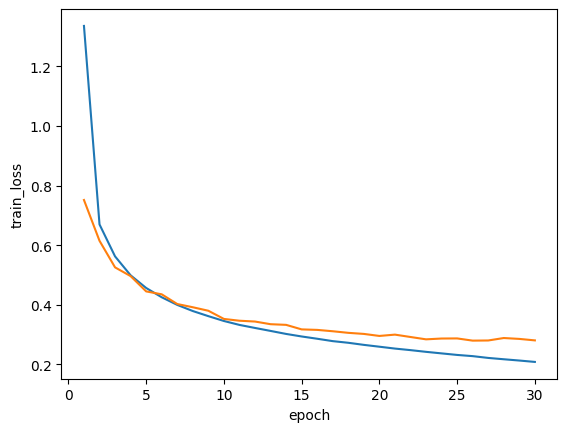

In [10]:
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")

In [11]:
df_train_sum = df_count_train.groupby("execution").sum()
seconds_avg = round(df_train_sum["time"].mean())
minutes_avg = seconds_avg // 60
seconds_avg = seconds_avg % 60
print(f"Tempo médio de treino: {minutes_avg}:{seconds_avg}")

Tempo médio de treino: 10:5


## Comparando com funções build-in

In [12]:
# acurácia média
acc_test = df_count_test["val_acc"].mean()
acc_test_original = df_original_test["val_acc"].mean()
diff = (acc_test - acc_test_original) / acc_test_original
print(acc_test, acc_test_original, diff)

0.8953399999999998 0.9015600000000001 -0.006899152579972864


<Axes: xlabel='epoch', ylabel='train_loss'>

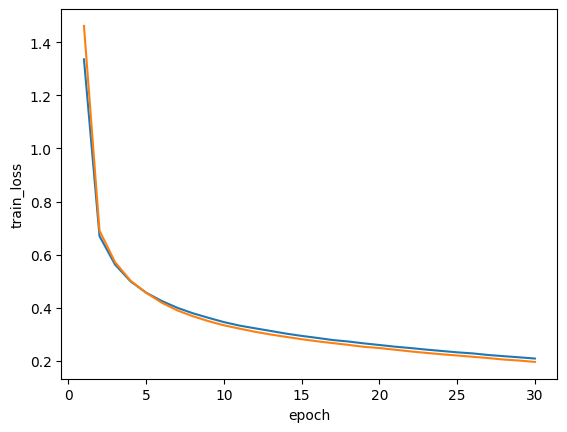

In [13]:
df_train_avg = df_count_train.groupby("epoch").mean()
df_train_avg_original = df_original_train.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg_original, x="epoch", y="train_loss")

<Axes: xlabel='epoch', ylabel='val_loss'>

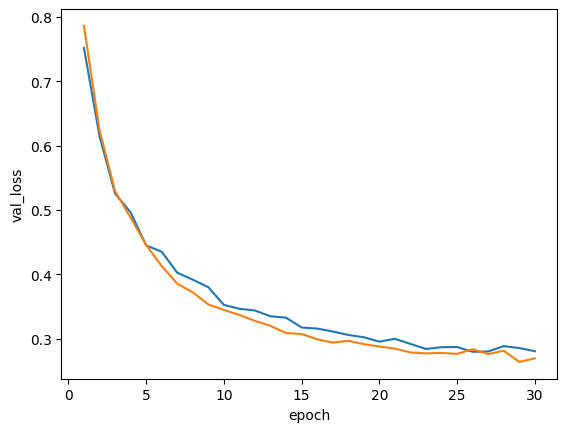

In [14]:
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")
sns.lineplot(data=df_train_avg_original, x="epoch", y="val_loss")

<Axes: xlabel='epoch', ylabel='value'>

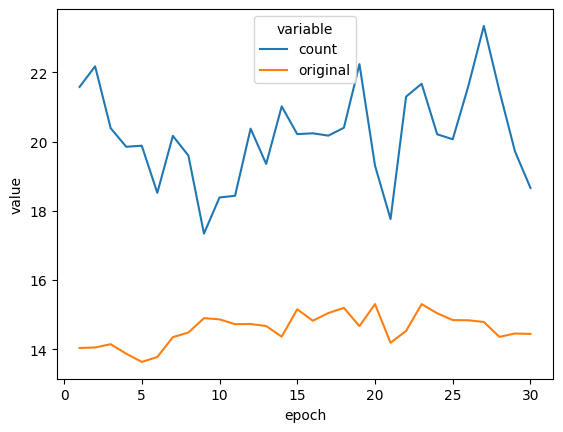

In [15]:
temp = pd.DataFrame()
temp["count"] = df_train_avg["time"]
temp["original"] = df_train_avg_original["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
sns.lineplot(data=temp, x="epoch", y="value", hue="variable")

## Comparando com funções diferenciáveis

In [16]:
df_train_avg_diff = df_diff_train.groupby("epoch").mean()
df_train_avg_diff

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
1,3.0,2.191191,1.820529,0.317467,28.552941,0.0,0.0,NaN
2,3.0,1.113295,0.729679,0.727333,27.945706,0.0,0.0,NaN
3,3.0,0.653121,0.583923,0.780522,29.420388,0.0,0.0,NaN
4,3.0,0.542889,0.492449,0.817144,29.011039,0.0,0.0,NaN
5,3.0,0.479159,0.446906,0.838844,28.514325,0.0,0.0,NaN
6,3.0,0.436290,0.414899,0.848389,29.089105,0.0,0.0,NaN
7,3.0,0.401389,0.387665,0.860200,28.265932,0.0,0.0,NaN
8,3.0,0.375565,0.367134,0.867056,27.631400,0.0,0.0,NaN
9,3.0,0.355087,0.349301,0.874456,26.439846,0.0,0.0,NaN


Text(0.5, 1.0, 'Tempo por Epoca')

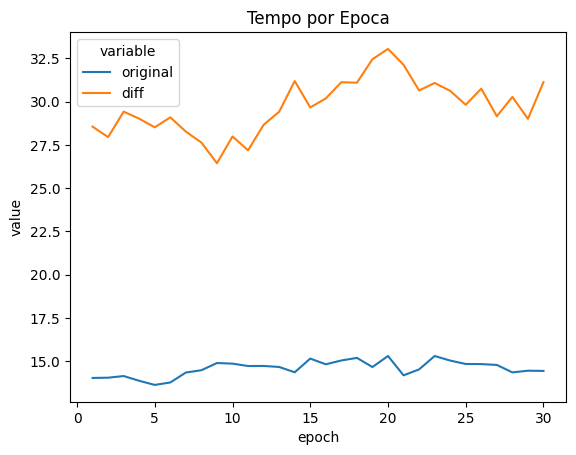

In [17]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["time"]
temp["diff"] = df_train_avg_diff["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Tempo por Epoca")

In [18]:
# tempo total de treino
time_original = round(df_train_avg_original["time"].sum())
time_diff = round(df_train_avg_diff["time"].sum())

print(f"Tempo total de treino (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo total de treino (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo total de treino (não diff): 07:18
Tempo total de treino (diff): 14:51
Diferença: 103.42%


Text(0.5, 1.0, 'Loss (Treino) por Epoca')

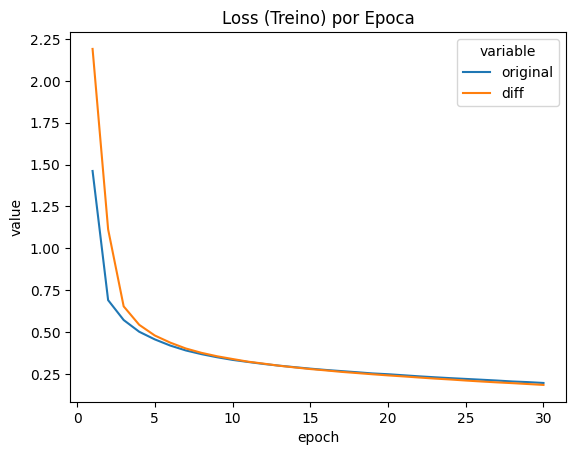

In [19]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["train_loss"]
temp["diff"] = df_train_avg_diff["train_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Treino) por Epoca")

Text(0.5, 1.0, 'Loss (Validacao) por Epoca')

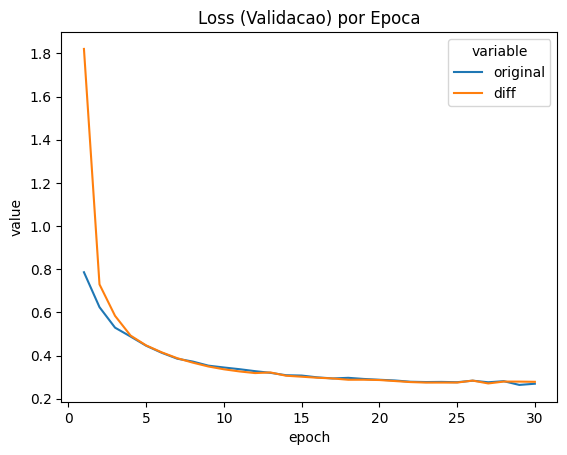

In [20]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_loss"]
temp["diff"] = df_train_avg_diff["val_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Validacao) por Epoca")

Text(0.5, 1.0, 'Acurácia (Validacao) por Epoca')

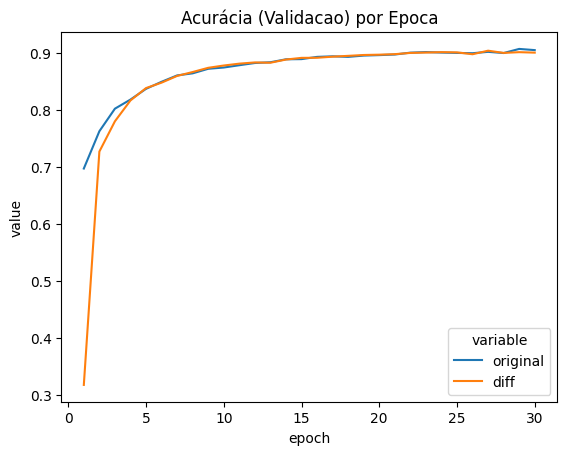

In [21]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_acc"]
temp["diff"] = df_train_avg_diff["val_acc"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Acurácia (Validacao) por Epoca")

In [22]:
# melhor época original
df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()]

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
29,3.0,0.200532,0.263887,0.907633,14.452969,0.0,0.0,NaN


In [23]:
# melhor época diff
df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()]

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
27,3.0,0.199089,0.270719,0.904522,29.151658,0.0,0.0,NaN


In [24]:
# tempo para chegar na melhor época
epoch_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()].index[0]
epoch_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()].index[0]

time_original = round(df_train_avg_original.head(epoch_original)["time"].sum())
time_diff = round(df_train_avg_diff.head(epoch_diff)["time"].sum())

print(f"Tempo de treino até melhor época (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo de treino até melhor época (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo de treino até melhor época (não diff): 07:03
Tempo de treino até melhor época (diff): 13:21
Diferença: 89.36%
